In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/งาน/Text Analytics/top100_kdrama.csv')

data = data.rename(columns = {'Year of release': 'year_of_release', 'Aired Date': 'aired_date','Aired On':'aired_on',
                       'Number of Episode':'number_of_epidsode', 'Content Rating':'content_rating'}, inplace = False)
data.sample(10)

,Name,year_of_release,aired_date,aired_on,number_of_epidsode,Network,Duration,content_rating,Synopsis,Cast,Genre,Tags,Rank,Rating
54,Eulachacha Waikiki,2018,"Feb 5, 2018 - Apr 17, 2018","Monday, Tuesday",20,jTBC,1 hr. 5 min.,15+ - Teens 15 or older,"Three very different young men – Dong Goo, the...","Kim Jung Hyun, Lee Yi Kyung, Son Seung Won, Ju...","Friendship, Comedy, Life, Youth, Drama","Housemates, Bromance, Friends To Lovers, Singl...",#55,8.6
98,Mad for Each Other,2021,"May 24, 2021 - Jun 21, 2021","Monday, Tuesday, Wednesday",13,"Daum Kakao TV, Netflix, Netflix, Netflix, ...",35 min.,15+ - Teens 15 or older,About two people with their own painful storie...,"Oh Yeon Seo, Jung Woo, Lee Soo Hyun, Ahn Woo Y...","Comedy, Romance, Drama","Trauma, Enemies To Lovers, Healing, Character ...",#99,8.5
79,Missing,2020,"Aug 29, 2020 - Oct 11, 2020","Saturday, Sunday",12,OCN,1 hr. 10 min.,15+ - Teens 15 or older,"A village holds spirits of missing, deceased p...","Go Soo, Heo Joon Ho, Ahn So Hee, Ha Joon, Seo ...","Suspense, Thriller, Mystery, Crime, Fantasy","Con Artist, Ghost-seeing Male Lead, Spirit, Mi...",#80,8.5
92,Beautiful World,2019,"Apr 5, 2019 - May 25, 2019","Friday, Saturday",16,"jTBC, Viki",60 min.,15+ - Teens 15 or older,This drama is about a boy on the edge of life ...,"Park Hee Soon , Choo Ja Hyun, Oh Man Suk, Cho ...","Life, School, Family, Melodrama","School Bullying, Family Relationship, Coma, Te...",#93,8.5
50,Hot Stove League,2019,"Dec 13, 2019 - Feb 14, 2020","Friday, Saturday",16,SBS,1 hr. 2 min.,15+ - Teens 15 or older,About the preparation period of a major league...,"Namgoong Min, Park Eun Bin, Cho Byeong Kyu, Oh...","Drama, Sports, Melodrama","Hardworking Female Lead, Baseball, Hardworking...",#51,8.7
52,Strangers from Hell,2019,"Aug 31, 2019 - Oct 6, 2019","Saturday, Sunday",10,OCN,60 min.,15+ - Teens 15 or older,Yoon Jong Woo is a young guy in his 20s who mo...,"Im Shi Wan, Lee Dong Wook, Lee Jung Eun, Ahn E...","Thriller, Horror, Psychological, Drama","Adapted From A Webtoon, Murder, Hostel, PTSD, ...",#53,8.6
7,Signal,2016,"Jan 22, 2016 - Mar 12, 2016","Friday, Saturday",16,tvN,1 hr. 15 min.,15+ - Teens 15 or older,"Fifteen years ago, a young girl was kidnapped ...","Lee Je Hoon, Kim Hye Soo, Jo Jin Woong, Kim Wo...","Thriller, Mystery, Crime, Drama, Supernatu...","Different Timelines, Hwaseong Serial Murders, ...",#8,9.0
69,365,2020,"Mar 23, 2020 - Apr 28, 2020","Monday, Tuesday",24,MBC,35 min.,15+ - Teens 15 or older,A story where ten people get the chance to go ...,"Lee Joon Hyuk, Nam Ji Hyun, Kim Jee Soo, Lee S...","Thriller, Mystery, Drama, Fantasy","Strong Female Lead, Time Travel, Nice Male Lea...",#70,8.6
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",#4,9.1
65,Just Between Lovers,2017,"Dec 11, 2017 - Jan 30, 2018","Monday, Tuesday",16,jTBC,1 hr. 13 min.,15+ - Teens 15 or older,A major accident takes the lives of 48 people....,"Lee Jun Ho, Won Jin Ah, Lee Ki Woo, Kang Han N...","Psychological, Romance, Melodrama","Trauma, Healing, Survivor Guilt, Hardworking F...",#66,8.6


Context for each columns


*   Name : Korean Drama name
*   Year of release : Release year of the drama
*   Aired Date : Aired Date (start) - (end)
*   Aired On : Aired on what day(s) of the week
*   Number of Episode : How many episodes are there
*   Network : What Network is the drama aired on
*   Duration : How long is one episode approximately
*   Content Rating: Content rate for appropriate audience
*   Synopsis : Short story of the drama
*   Cast : Actors and Actresses in the drama
*   Genre : Genre that the drama is listed in
*   Tags : Tags that the drama is listed in
*   Rank : Ranking on the website
*   Rating : Rating by the users on the website out of ten













In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                100 non-null    object 
 1   year_of_release     100 non-null    int64  
 2   aired_date          100 non-null    object 
 3   aired_on            100 non-null    object 
 4   number_of_epidsode  100 non-null    int64  
 5   Network             100 non-null    object 
 6   Duration            100 non-null    object 
 7   content_rating      100 non-null    object 
 8   Synopsis            100 non-null    object 
 9   Cast                100 non-null    object 
 10  Genre               100 non-null    object 
 11  Tags                100 non-null    object 
 12  Rank                100 non-null    object 
 13  Rating              100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,100.0,2017.680,2.827999,2003.0,2016.75,2018.0,2020.0,2021.0
number_of_epidsode,100.0,19.530,12.307881,6.0,16.00,16.0,20.0,100.0
Rating,100.0,8.703,0.178351,8.5,8.60,8.7,8.8,9.2


In [ ]:
data.isna().sum()

Name                  0
year_of_release       0
aired_date            0
aired_on              0
number_of_epidsode    0
Network               0
Duration              0
content_rating        0
Synopsis              0
Cast                  0
Genre                 0
Tags                  0
Rank                  0
Rating                0
dtype: int64

In [ ]:
data["Network"].unique()

array(['Netflix,  Netflix,  Netflix,  Netflix ',
       'tvN,  Netflix,  Netflix,  Netflix,  Netflix ', 'tvN ', 'jTBC ',
       'KBS2 ', 'OCN,  Netflix,  Netflix,  Netflix,  Netflix ', 'SBS ',
       'OCN ', 'MBC ', 'Netflix ',
       'jTBC,  Netflix,  Netflix,  Netflix,  Netflix ',
       'KBS2,  Netflix,  Netflix,  Netflix,  Netflix ', 'jTBC,  Viki ',
       'SBS,  Netflix,  Netflix,  Netflix,  Netflix ',
       'Daum Kakao TV,  Netflix,  Netflix,  Netflix,  Netflix '],
      dtype=object)

Remove duplicated network

In [ ]:
def remove_duplicate_network(word):
    bag = []
    bag.extend(list(set(word.replace(" ","").split(","))))
    return ",".join(bag)

In [ ]:
data["Network"] = data["Network"].apply(remove_duplicate_network)

In [ ]:
data["Network"] = data["Network"].apply(remove_duplicate_network)

In [ ]:
data.sample(10) 

,Name,year_of_release,aired_date,aired_on,number_of_epidsode,Network,Duration,content_rating,Synopsis,Cast,Genre,Tags,Rank,Rating
37,Dr. Romantic 2,2020,"Jan 6, 2020 - Feb 25, 2020","Monday, Tuesday",16,SBS,1 hr. 10 min.,15+ - Teens 15 or older,"A “real doctor” story set in a small, humble h...","Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, Ki...","Romance, Drama, Medical, Melodrama","Hospital, Smart Male Lead, Doctor, Character D...",#38,8.7
22,Weightlifting Fairy Kim Bok Joo,2016,"Nov 16, 2016 - Jan 11, 2017","Wednesday, Thursday",16,MBC,60 min.,15+ - Teens 15 or older,Bok Joo is a weightlifter who is pursuing her ...,"Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Friendship, Comedy, Romance, School, Youth...","College Life, Dream, Friends To Lovers, Weight...",#23,8.8
84,Because This Is My First Life,2017,"Oct 9, 2017 - Nov 28, 2017","Monday, Tuesday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,A house-poor man and homeless woman become hou...,"Jung So Min, Lee Min Ki, Esom, Park Byung Eun,...","Friendship, Comedy, Romance, Life, Drama","Contract Relationship, Marriage Of Convenience...",#85,8.5
99,The Princess's Man,2011,"Jul 20, 2011 - Oct 6, 2011","Wednesday, Thursday",24,KBS2,1 hr. 5 min.,15+ - Teens 15 or older,Princess Se Ryung is the headstrong and forwar...,"Park Shi Hoo, Moon Chae Won, Kim Yeong Cheol, ...","Action, Historical, Romance, Political","Forbidden Love, Strong Male Lead, Power Strugg...",#100,8.5
43,Descendants of the Sun,2016,"Feb 24, 2016 - Apr 14, 2016","Wednesday, Thursday",16,KBS2,60 min.,15+ - Teens 15 or older,A love story that develops between a surgeon a...,"Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji W...","Action, Military, Comedy, Romance, Medical...","Soldier, Hardworking Female Lead, Doctor, Mult...",#44,8.7
97,Be Melodramatic,2019,"Aug 9, 2019 - Sep 28, 2019","Friday, Saturday",16,"jTBC,Viki",1 hr. 5 min.,15+ - Teens 15 or older,"Im Jin Joo, Lee Eun Jung, and Hwang Han Joo ar...","Chun Woo Hee, Jeon Yeo Bin, Han Ji Eun, Ahn Ja...","Friendship, Comedy, Romance, Life, Melodrama","Multiple Mains, Sismance, Strong Female Lead, ...",#98,8.5
68,Cruel City,2013,"May 27, 2013 - Jul 30, 2013","Monday, Tuesday",20,jTBC,60 min.,15+ - Teens 15 or older,Heartless City portrays the cruel life of the ...,"Jung Kyung Ho, Nam Gyu Ri, Lee Jae Yoon, Son C...","Action, Thriller, Romance, Crime","Badass Male Lead, Gang, Bromance, Strong Femal...",#69,8.6
14,Kingdom,2020,"Mar 13, 2020",Friday,6,Netflix,45 min.,18+ Restricted (violence & profanity),"Following the events in season one, waves of t...","Joo Ji Hoon, Ryu Seung Ryong, Bae Doo Na, Kim ...","Thriller, Historical, Horror, Zombies","Strong Female Lead, Corruption, Strong Male Le...",#15,8.9
45,Dr. Romantic,2016,"Nov 7, 2016 - Jan 16, 2017","Monday, Tuesday",20,SBS,60 min.,15+ - Teens 15 or older,Kim Sa Bu was once a famous surgeon at the pea...,"Han Seok Kyu, Yoo Yeon Seok, Seo Hyun Jin, Cho...","Romance, Drama, Medical","Doctor, Surgeon, Smart Male Lead, Strong Femal...",#46,8.7
55,The Bridal Mask,2012,"May 30, 2012 - Sep 6, 2012","Wednesday, Thursday",28,KBS2,1 hr. 5 min.,15+ - Teens 15 or older,Lee Kang To is an ambitious and callous Korean...,"Joo Won, Jin Se Yeon, Park Ki Woong, Han Chae ...","Action, Historical, Romance, Political","Japanese Colonial Rule, Hidden Identity, Reven...",#56,8.6


# Recommendation by Caster (Word2Vec)

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [ ]:
data['tokens'] = data['Synopsis'].apply(prepare, pipeline=pipeline)

In [ ]:
data['Actors'] = data['Cast']
for i in range(len(data['Cast'])):
  data['Actors'][i] = nltk.regexp_tokenize(data['Cast'][i], r'[,\"]\s*', gaps=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_actor = data.drop(['year_of_release','number_of_epidsode','aired_date','aired_on','Network','Duration'], axis='columns')
#df_actor = df_actor.set_index('Name')

In [ ]:
df_actor = df_actor.drop(['content_rating',	'Synopsis',	'Cast',	'Genre',	'Tags',	'Rank',	'Rating',	'tokens'], axis='columns')

In [ ]:
df_actor.sample(3)

,Name,Actors
1,Hospital Playlist,"[Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Ki..."
25,Sweet Home,"[Song Kang, Lee Jin Wook, Lee Shi Young, Lee D..."
65,Just Between Lovers,"[Lee Jun Ho, Won Jin Ah, Lee Ki Woo, Kang Han ..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
for i in range(len(df_actor)):
  df_actor['Actors'][i] = [w.lower() for w in df_actor['Actors'][i]]
  df_actor['Actors'][i] = [w.replace(' ','') for w in df_actor['Actors'][i]]


In [ ]:
df_actor['Actors']

0     [leejehoon, tangjunsang, hongseunghee, jungsuk...
1     [jojungsuk, yooyeonseok, jungkyungho, kimdaemy...
2     [leejoongi, moonchaewon, jangheejin, seohyunwo...
3     [leesunkyun, iu, parkhosan, songsaebyuk, leeji...
4     [parkhaesoo, jungkyungho, krystal, imhwayoung,...
                            ...                        
95    [shinhaesun, yangsejong, ahnhyoseop, yejiwon, ...
96    [leeseunggi, baesuzy, shinsungrok, baekyoonshi...
97    [chunwoohee, jeonyeobin, hanjieun, ahnjaehong,...
98    [ohyeonseo, jungwoo, leesoohyun, ahnwooyeon, k...
99    [parkshihoo, moonchaewon, kimyeongcheol, songj...
Name: Actors, Length: 100, dtype: object

In [ ]:
actor_tex = []
actor = [w for w in df_actor['Actors']]

for i in range(len(actor)):
  actor_tex.append(' '.join(actor[i]))
df_actor['Actors'] = actor_tex
df_actor['Actors']

0     leejehoon tangjunsang hongseunghee jungsukyong...
1     jojungsuk yooyeonseok jungkyungho kimdaemyung ...
2     leejoongi moonchaewon jangheejin seohyunwoo na...
3     leesunkyun iu parkhosan songsaebyuk leejiah ki...
4     parkhaesoo jungkyungho krystal imhwayoung yeso...
                            ...                        
95    shinhaesun yangsejong ahnhyoseop yejiwon wangj...
96    leeseunggi baesuzy shinsungrok baekyoonshik mo...
97    chunwoohee jeonyeobin hanjieun ahnjaehong gong...
98    ohyeonseo jungwoo leesoohyun ahnwooyeon kimnam...
99    parkshihoo moonchaewon kimyeongcheol songjongh...
Name: Actors, Length: 100, dtype: object

In [ ]:
df_actor[df_actor['Name']=='Move to Heaven']['Actors'].values

array(['leejehoon tangjunsang hongseunghee jungsukyong jungyoungjoo leemoonshik'],
      dtype=object)

In [ ]:
df_actor[df_actor['Name']=='Navillera']['Actors'].values

array(['parkinhwan songkang namoonhee hongseunghee kimtaehoon yoonjihye'],
      dtype=object)

In [ ]:
df_actor[df_actor['Name']=='Signal']['Actors'].values

array(['leejehoon kimhyesoo jojinwoong kimwonhae leeyoojoon janghyunsung'],
      dtype=object)

In [ ]:
df_actor[df_actor['Name']=='Taxi Driver']['Actors'].values

array(['leejehoon esom kimeuisung pyoyejin chajiyeon janghyukjin'],
      dtype=object)

In [ ]:
df_actor['Actors'] = df_actor['Actors'].apply(prepare, pipeline=pipeline)

In [ ]:
df_onlyAc = df_actor.apply(lambda x: ';'.join(x.astype(str)), axis=1)
df_onlyAc.head(5)

0    Move to Heaven;['leejehoon', 'tangjunsang', 'h...
1    Hospital Playlist;['jojungsuk', 'yooyeonseok',...
2    Flower of Evil;['leejoongi', 'moonchaewon', 'j...
3    My Mister;['leesunkyun', 'iu', 'parkhosan', 's...
4    Prison Playbook;['parkhaesoo', 'jungkyungho', ...
dtype: object

In [ ]:
df_acClean = pd.DataFrame({'clean': df_onlyAc})
df_acClean.head(5)

,clean
0,"Move to Heaven;['leejehoon', 'tangjunsang', 'h..."
1,"Hospital Playlist;['jojungsuk', 'yooyeonseok',..."
2,"Flower of Evil;['leejoongi', 'moonchaewon', 'j..."
3,"My Mister;['leesunkyun', 'iu', 'parkhosan', 's..."
4,"Prison Playbook;['parkhaesoo', 'jungkyungho', ..."


In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

sent = [row.split(';') for row in df_acClean['clean']]
model = Word2Vec(sent, min_count=1,size= 300,workers=5, window=10, sg = 1, iter=100)

In [ ]:
model.wv.similarity('Move to Heaven', 'Move to Heaven')

1.0

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df_acClean['clean'])

CountVectorizer()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dt = cv.transform(df_acClean['clean'])
dt

<100x610 sparse matrix of type '<class 'numpy.int64'>'
	with 840 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [ ]:
cosine_sim = cosine_similarity(dt)

In [ ]:
def movie_recommend_by_cast(movie, similar_no=5):
  #actor = actor.lower()
  #actor_choose = actor.replace(' ','')
  movie_choose = movie
  try:
    index_ref = df_actor[df_actor["Name"].str.contains(movie_choose, case=False)].index[0]
    similar_movies = list(enumerate(cosine_sim[index_ref]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:]

    print("\nRecommended movies for [{}]".format(movie_choose))
    print("."*(24+len(movie_choose)))

    for i, element in enumerate(sorted_similar_movies):
      similar_movie_id = element[0]
      similar_movie_title = df_actor['Name'].iloc[similar_movie_id]
      s_score = element[1]
      print('{:40} -> {:.3f}'.format(similar_movie_title, s_score))

      if i > similar_no:
        break


  except IndexError:
    print("The movie is not found in this list")


In [ ]:
movie_recommend_by_cast("Move to Heaven",5)


Recommended movies for [Move to Heaven]
......................................
Signal                                   -> 0.126
Navillera                                -> 0.126
Taxi Driver                              -> 0.118
It's Okay to Not Be Okay                 -> 0.089
Hospital Playlist                        -> 0.000
Flower of Evil                           -> 0.000
My Mister                                -> 0.000


## Casting word2vec น่าจะสิ้นสุดแค่ตรงนี้ ^

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf_dt = tfidf.fit_transform(dt)
pd.DataFrame(tfidf_dt.toarray(), columns=cv.get_feature_names())

,ahnbohyun,ahneunjin,ahnhyoseop,ahnjaehong,ahnjaewook,ahnjiho,ahnnaesang,ahnseunggyun,ahnsohee,ahnsukhwan,ahnwooyeon,baedoona,baehaeseon,baejongok,baekjinhee,baekjiwon,baekyoonshik,baesungwoo,baesuzy,bongtaekyu,byunbaekhyun,byunyohan,chaegookhee,chaesoobin,chahwayun,chajiyeon,chobyeongkyu,chohyejung,choibyungmo,choidaehoon,choijaewoong,choijinho,choijinhyuk,choijungwoo,choiminsoo,choimoosung,choisungeun,choiwonyoung,choiyoonyoung,choojahyun,...,sonhojun,sonjonghak,sonseokkoo,sonseungwon,sonyejin,sungdongil,tangjunsang,uhmhyosub,uhmhyunkyung,uhmkijoon,wangjiwon,wihajoon,wonjinah,woodohwan,woojihyun,yangkyungwon,yangmikyung,yangsejong,yejiwon,yeojingoo,yeomhyeran,yeomjungah,yesoojung,yooahin,yooinna,yoojaemyung,yoojitae,yoojoonsang,yooksungjae,yoonhyunmin,yoonjihye,yoonjonghoon,yoonjoosang,yoonkyunsang,yoonpark,yoonsanghyun,yoonseah,yoonsunwoo,yooyeonseok,younyuhjung
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.423326,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.375241,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.39035,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.420245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.394071,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.429448,0.0,0.0,0.0,0.0,0.0,0.0,0.394071,0.429448,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429448,0.000000,0.0
96,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.429448,0.0,0.394071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
97,0.0,0.0,0.000000,0.38488

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(cosine_similarity(tfidf_dt))

NameError: ignored

# Recommend by Synopsis (Word2Vec)

In [ ]:
nltk.download('wordnet')

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [ ]:
def tok(txt):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  tokens_0 = tokenizer.tokenize(txt)
  return tokens_0

In [ ]:
df_syn = data[['Name',	'content_rating',	'Synopsis',	'Genre',	'Tags']]
df_syn[['Synopsis','Genre', 'Tags']] = df_syn[['Synopsis','Genre', 'Tags']].apply(lambda x: x.str.replace(', ', ','))
df_syn[['Synopsis','Genre', 'Tags']] = df_syn[['Synopsis','Genre', 'Tags']].apply(lambda x: x.str.replace(', ', ','))
df_syn[['Genre', 'Tags']] = df_syn[['Genre', 'Tags']].apply(lambda x: x.str.strip())
df_syn[['Genre', 'Tags']] = df_syn[['Genre', 'Tags']].apply(lambda x: x.str.replace(',', ';'))

df_syn['Synopsis'] = df_syn['Synopsis'].apply(prepare, pipeline=pipeline)

df_syn.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Name,content_rating,Synopsis,Genre,Tags
0,Move to Heaven,18+ Restricted (violence & profanity),"[geu, roo, young, autistic, man, works, father...",Life;Drama;Family,Autism;Father-Son Relationship;Uncle-Nephew Re...
1,Hospital Playlist,15+ - Teens 15 or older,"[stories, people, going, days, seemingly, ordi...",Friendship;Romance;Life;Medical,Strong Friendship;Doctor;Multiple Mains;Slow R...
2,Flower of Evil,15+ - Teens 15 or older,"[although, baek, hee, sung, hiding, dark, secr...",Thriller;Romance;Crime;Melodrama,Married Couple;Deception;Suspense;Family Secre...
3,My Mister,15+ - Teens 15 or older,"[park, dong, hoon, middle-aged, engineer, marr...",Business;Psychological;Life;Drama;Family,Nice Male Lead;Strong Female Lead;Hardship;Sma...
4,Prison Playbook,15+ - Teens 15 or older,"[kim, je, hyuk, famous, baseball, player, arre...",Comedy;Life;Drama,Prison;Bromance;Wrongfully Accused;Life Lesson...


In [ ]:
df_syn_con = df_syn.apply(lambda x: ';'.join(x.astype(str)), axis=1)
df_syn_con.head(5)

0    Move to Heaven;18+ Restricted (violence & prof...
1    Hospital Playlist;15+ - Teens 15 or older ;['s...
2    Flower of Evil;15+ - Teens 15 or older ;['alth...
3    My Mister;15+ - Teens 15 or older ;['park', 'd...
4    Prison Playbook;15+ - Teens 15 or older ;['kim...
dtype: object

In [ ]:
df_clean = pd.DataFrame({'clean': df_syn_con})
df_clean.head(5)

,clean
0,Move to Heaven;18+ Restricted (violence & prof...
1,Hospital Playlist;15+ - Teens 15 or older ;['s...
2,Flower of Evil;15+ - Teens 15 or older ;['alth...
3,"My Mister;15+ - Teens 15 or older ;['park', 'd..."
4,Prison Playbook;15+ - Teens 15 or older ;['kim...


In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

sent = [row.split(';') for row in df_clean['clean']]
model = Word2Vec(sent, min_count=1,size= 300,workers=5, window=10, sg = 1, iter=100)

In [ ]:
index_ref = df_actor[df_actor["Name"].str.contains('Kill Me, Heal Me', case=False)].index[0]
index_ref

34

In [ ]:
model.wv.similarity('Move to Heaven', 'Taxi Driver')

0.5394433

In [ ]:
import numpy as np
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [ ]:
# only get the unique Maker_Model
mov_name = list(df_syn.Name.unique()) 
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance(model,'Kingdom',mov_name,5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


[('Sweet Home', 0.94503313),
 ('The Guest', 0.8280403),
 ('Vagabond', 0.7845173),
 ('Moon Lovers', 0.7831925),
 ("The Princess's Man", 0.774066)]

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

# Trend of the Year

## Trend of Genre

In [ ]:
df_trend = data.drop(['Name','number_of_epidsode','aired_on','Network','Duration','content_rating',	'Synopsis',	'Cast',	'Rank',	'Rating', 'tokens', 'Actors'], axis='columns')
df_trend['Genre'] = [w.replace(' ','') for w in df_trend['Genre']]

In [ ]:
df_trend

,year_of_release,aired_date,Genre,Tags
0,2021,"May 14, 2021","Life,Drama,Family","Autism, Father-Son Relationship, Uncle-Nephew ..."
1,2020,"Mar 12, 2020 - May 28, 2020","Friendship,Romance,Life,Medical","Strong Friendship, Doctor, Multiple Mains, Slo..."
2,2020,"Jul 29, 2020 - Sep 23, 2020","Thriller,Romance,Crime,Melodrama","Married Couple, Deception, Suspense, Family Se..."
3,2018,"Mar 21, 2018 - May 17, 2018","Business,Psychological,Life,Drama,Family","Nice Male Lead, Strong Female Lead, Hardship, ..."
4,2017,"Nov 22, 2017 - Jan 18, 2018","Comedy,Life,Drama","Prison, Bromance, Wrongfully Accused, Life Les..."
...,...,...,...,...
95,2018,"Jul 23, 2018 - Sep 18, 2018","Music,Mystery,Comedy,Romance,Drama","Cohabitation, Healing, First Love, Coma, Tragi..."
96,2019,"Sep 20, 2019 - Nov 23, 2019","Action,Thriller,Mystery,Crime,Melodrama","Plane Crash, Revenge, National Intelligence Se..."
97,2019,"Aug 9, 2019 - Sep 28, 2019","Friendship,Comedy,Romance,Life,Melodrama","Multiple Mains, Sismance, Strong Female Lead, ..."
98,2021,"May 24, 2021 - Jun 21, 2021","Comedy,Romance,Drama","Trauma, Enemies To Lovers, Healing, Character ..."


In [ ]:
df_trend = df_trend.astype({'year_of_release':'str'})

In [ ]:
all_kdrama = df_trend.groupby('year_of_release').size()
all_kdrama

year_of_release
2003     1
2011     1
2012     2
2013     5
2014     4
2015     3
2016     9
2017    17
2018    11
2019    17
2020    20
2021    10
dtype: int64

Text(0, 0.5, 'Number of Kdrama')

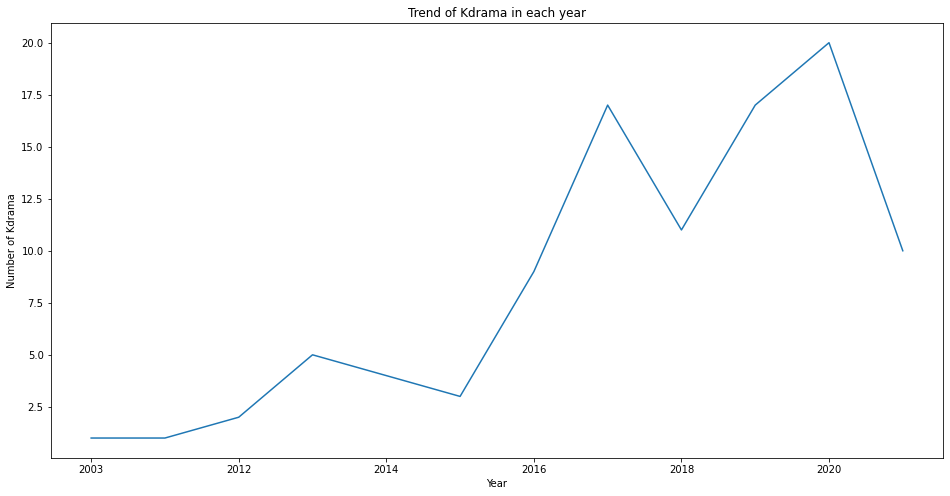

In [ ]:
all_kdrama.to_string()
all_kdrama.plot(kind='line', figsize=(16,8))
plt.title("Trend of Kdrama in each year")
plt.xlabel('Year')
plt.ylabel('Number of Kdrama')

In [ ]:
df_trend['genre_tok'] = data['Genre']
for i in range(len(data['Cast'])):
  df_trend['genre_tok'][i] = nltk.regexp_tokenize(df_trend['Genre'][i], r'[,\"]\s*', gaps=True)

In [ ]:
df_trend['genre_tok'] = data['Genre']
df_trend['tags_tok'] = data['Tags']

for i in range(len(data['Cast'])):
  df_trend['genre_tok'][i] = nltk.regexp_tokenize(df_trend['Genre'][i], r'[,\"]\s*', gaps=True)
  df_trend['tags_tok'][i] = nltk.regexp_tokenize(df_trend['Tags'][i], r'[,\"]\s*', gaps=True)

In [ ]:
from collections import Counter
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
keywords = []
for i in range(len(df_trend['genre_tok'])):
  keywords.extend(df_trend['genre_tok'][i])
  keywords = [w.replace(' ','') for w in keywords]

keywords_join = ' '.join(keywords)
#print(keywords_join)

keyword = set(keywords)
#keyword

In [ ]:
from collections import Counter
def count_words(df, column='tokens', preprocess=None, min_freq = 0):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [ ]:
freq_df_count = count_words(df_trend, column='genre_tok')
freq_df_count.head(10)

,freq
token,
Drama,71
Romance,53
Comedy,42
Thriller,32
Mystery,30
Life,20
Family,20
Crime,20
Action,19


In [ ]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

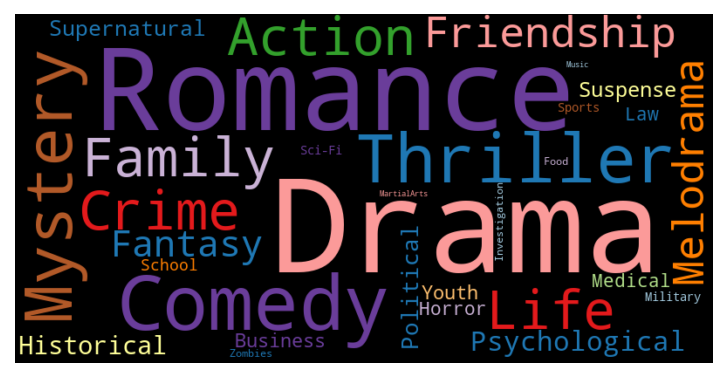

In [ ]:
plt.figure(dpi=150)
wordcloud(freq_df_count['freq'], max_words=100)

In [ ]:
#plt.figure(figsize=(12,4))
plt.figure(dpi=150)
#plt.subplot(1,2,1)###

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [ ]:
freq_df_count['freq'][:10]

token
Drama         71
Romance       53
Comedy        42
Thriller      32
Mystery       30
Life          20
Family        20
Crime         20
Action        19
Friendship    18
Name: freq, dtype: int64

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=freq_df_count['freq'][:10], x=freq_df_count.index, marker_color=['tan',]*15)],
    layout_title_text="A Figure shows top 10 genre of Kdrama")
fig.show()

In [ ]:
keyword_top = ['Romance', 'Drama', 'Comedy', 'Mystery', 'Thriller']
freq_df = count_keywords_by(df_trend, by='year_of_release', keywords=keyword_top, column='genre_tok')

In [ ]:
df_trend['genre_tok']

0                              [Life, Drama, Family]
1               [Friendship, Romance, Life, Medical]
2              [Thriller, Romance, Crime, Melodrama]
3     [Business, Psychological, Life, Drama, Family]
4                              [Comedy, Life, Drama]
                           ...                      
95          [Music, Mystery, Comedy, Romance, Drama]
96     [Action, Thriller, Mystery, Crime, Melodrama]
97    [Friendship, Comedy, Romance, Life, Melodrama]
98                          [Comedy, Romance, Drama]
99          [Action, Historical, Romance, Political]
Name: genre_tok, Length: 100, dtype: object

In [ ]:
keyword_top = ['Romance', 'Drama', 'Comedy', 'Mystery', 'Thriller']
freq_df = count_keywords_by(df_trend, by='year_of_release', keywords=keyword_top, column='genre_tok')

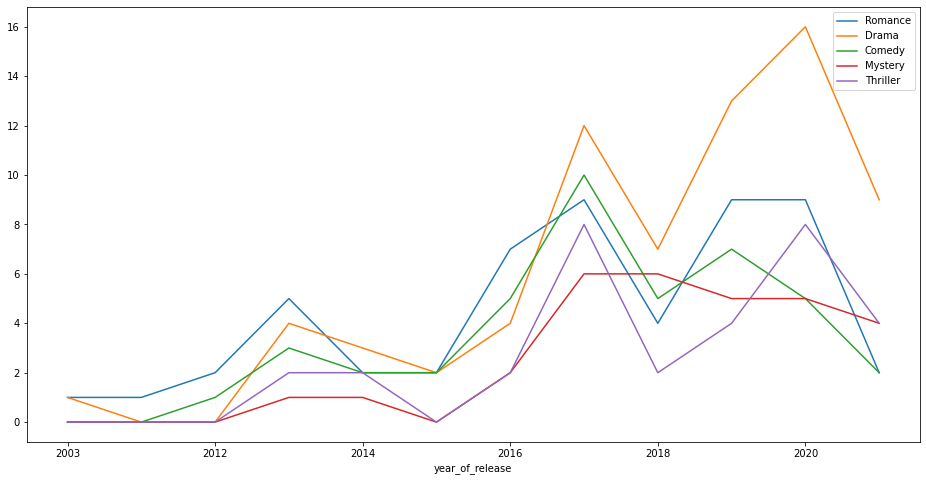

In [ ]:
freq_df.plot(kind='line', figsize=(16,8))

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
freq_2003_df = count_words((df_trend[(df_trend.year_of_release == '2003') | (df_trend.year_of_release =='2011')]), column='genre_tok', min_freq = 0)
freq_2012_df = count_words((df_trend[(df_trend.year_of_release == '2012') | (df_trend.year_of_release =='2013')]), column='genre_tok', min_freq = 0)
freq_2014_df = count_words((df_trend[(df_trend.year_of_release == '2014') | (df_trend.year_of_release =='2015')]), column='genre_tok', min_freq = 0)
freq_2016_df = count_words((df_trend[(df_trend.year_of_release == '2016') | (df_trend.year_of_release =='2017')]), column='genre_tok', min_freq = 0)
freq_2018_df = count_words((df_trend[(df_trend.year_of_release == '2018') | (df_trend.year_of_release =='2019')]), column='genre_tok', min_freq = 0)
freq_2020_df = count_words((df_trend[(df_trend.year_of_release == '2020') | (df_trend.year_of_release =='2021')]), column='genre_tok', min_freq = 0)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=freq_2003_df.index, values=freq_2003_df['freq'], name="Kdrama in 2003"),1, 1)
fig.add_trace(go.Pie(labels=freq_2012_df.index, values=freq_2012_df['freq'], name="Kdrama in 2012"),1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Kdrama in 2003 - 2012",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2003', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=freq_2014_df.index, values=freq_2014_df['freq'], name="Kdrama in 2014"),1, 1)
fig.add_trace(go.Pie(labels=freq_2016_df.index, values=freq_2016_df['freq'], name="Kdrama in 2016"),1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Kdrama in 2014 - 2016",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2014', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='2016', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=freq_2018_df.index, values=freq_2014_df['freq'], name="Kdrama in 2018"),1, 1)
fig.add_trace(go.Pie(labels=freq_2020_df.index, values=freq_2014_df['freq'], name="Kdrama in 2020"),1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Kdrama in 2018 - 2020",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2018', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='2020', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

## Trend of Tags

In [ ]:
freq_df_count = count_words(df_trend, column='tags_tok')
freq_df_count.head(10)

,freq
token,
Strong Female Lead,41
Smart Female Lead,23
Smart Male Lead,20
Murder,17
Bromance,17
Revenge,15
Strong Male Lead,15
Trauma,13
Multiple Mains,12


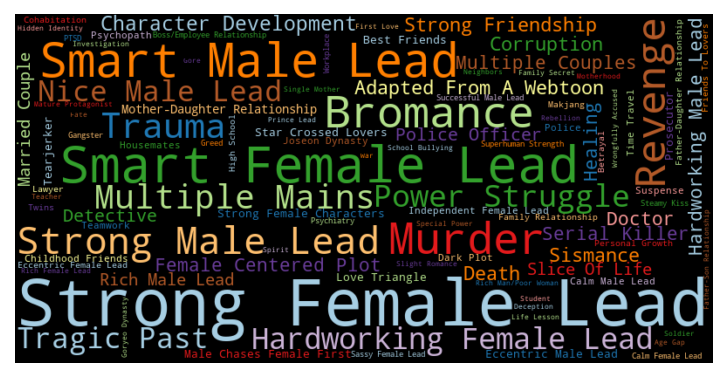

In [ ]:
#plt.figure(figsize=(12,4))
plt.figure(dpi=150)
#plt.subplot(1,2,1)###
wordcloud(freq_df_count['freq'], max_words=100)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



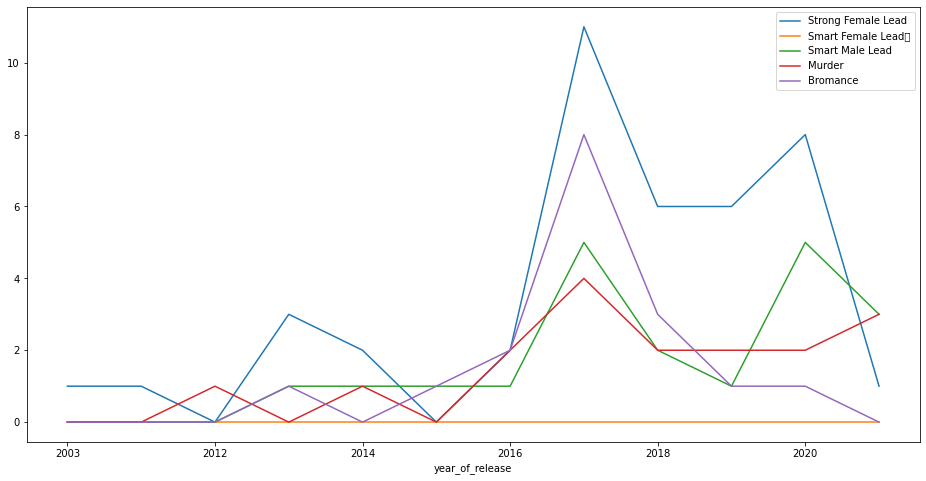

In [ ]:
keyword_top = ['Strong Female Lead', 'Smart Female Lead	', 'Smart Male Lead', 'Murder', 'Bromance']
freq_df = count_keywords_by(df_trend, by='year_of_release', keywords=keyword_top, column='tags_tok')
freq_df.plot(kind='line', figsize=(16,8))

In [ ]:
freq_df_count.index[:5]

Index(['Strong Female Lead', 'Smart Female Lead', 'Smart Male Lead', 'Murder',
       'Bromance'],
      dtype='object', name='token')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=freq_df_count['freq'], x=freq_df_count.index[:10], marker_color=['crimson',]*10)],
    layout_title_text="A Figure shows top 10 popular tags of Kdrama")
fig.show()

In [ ]:
freq_2003_df = count_words((df_trend[(df_trend.year_of_release == '2003') | (df_trend.year_of_release =='2011')]), column='tags_tok', min_freq = 0)
freq_2012_df = count_words((df_trend[(df_trend.year_of_release == '2012') | (df_trend.year_of_release =='2013')]), column='tags_tok', min_freq = 0)
freq_2014_df = count_words((df_trend[(df_trend.year_of_release == '2014') | (df_trend.year_of_release =='2015')]), column='tags_tok', min_freq = 0)
freq_2016_df = count_words((df_trend[(df_trend.year_of_release == '2016') | (df_trend.year_of_release =='2017')]), column='tags_tok', min_freq = 0)
freq_2018_df = count_words((df_trend[(df_trend.year_of_release == '2018') | (df_trend.year_of_release =='2019')]), column='tags_tok', min_freq = 0)
freq_2020_df = count_words((df_trend[(df_trend.year_of_release == '2020') | (df_trend.year_of_release =='2021')]), column='tags_tok', min_freq = 0)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=freq_2003_df.index, values=freq_2003_df['freq'], name="Kdrama in 2003"),1, 1)
fig.add_trace(go.Pie(labels=freq_2012_df.index, values=freq_2012_df['freq'], name="Kdrama in 2012"),1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Kdrama in 2003 - 2012",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2003', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

# Network

In [ ]:
m_year = data[(data.year_of_release == 2020) & (data.Genre.str.contains(' Drama',case=False))]
m_year.value_counts().sum()

0

In [ ]:
m_year = data[(data.year_of_release == 2020) & (m_year.Genre.str.contains(' Drama',case=False))]
m_year

,Name,year_of_release,aired_date,aired_on,number_of_epidsode,Network,Duration,content_rating,Synopsis,Cast,Genre,Tags,Rank,Rating,tokens,Actors


In [ ]:
def remove_duplicate_network(word):
    bag = []
    bag.extend(list(set(word.replace(" ","").split(",") ) ) )
    return list(bag)
m_year['Network'] = m_year['Network'].apply(remove_duplicate_network)

In [ ]:
m_year['Network']

Series([], Name: Network, dtype: object)

In [ ]:
data['network_tok'] = data['Network'].apply(lambda x: x[:].replace(', ', ','))
#data[['Synopsis','Genre', 'Tags']] = data[['Synopsis','Genre', 'Tags']].apply(lambda x: x.str.replace(', ', ','))
#data[['Genre', 'Tags']] = data[['Genre', 'Tags']].apply(lambda x: x.str.strip())
#data[['Genre', 'Tags']] = data[['Genre', 'Tags']].apply(lambda x: x.str.replace(',', ';'))

data['network_tok'] = data['Network'].apply(prepare, pipeline=pipeline)

In [ ]:
data['network_tok']

0                  [netflix, netflix, netflix, netflix]
1             [tvn, netflix, netflix, netflix, netflix]
2                                                 [tvn]
3                                                 [tvn]
4             [tvn, netflix, netflix, netflix, netflix]
                            ...                        
95                                                [sbs]
96            [sbs, netflix, netflix, netflix, netflix]
97                                         [jtbc, viki]
98    [daum, kakao, tv, netflix, netflix, netflix, n...
99                                               [kbs2]
Name: network_tok, Length: 100, dtype: object

In [ ]:
data = data.astype({'year_of_release':'str'})

In [ ]:
f = count_words(data, column='network_tok')
f

,freq
token,
netflix,101
tvn,32
sbs,19
jtbc,14
kbs2,11
mbc,10
ocn,8
viki,2
daum,1


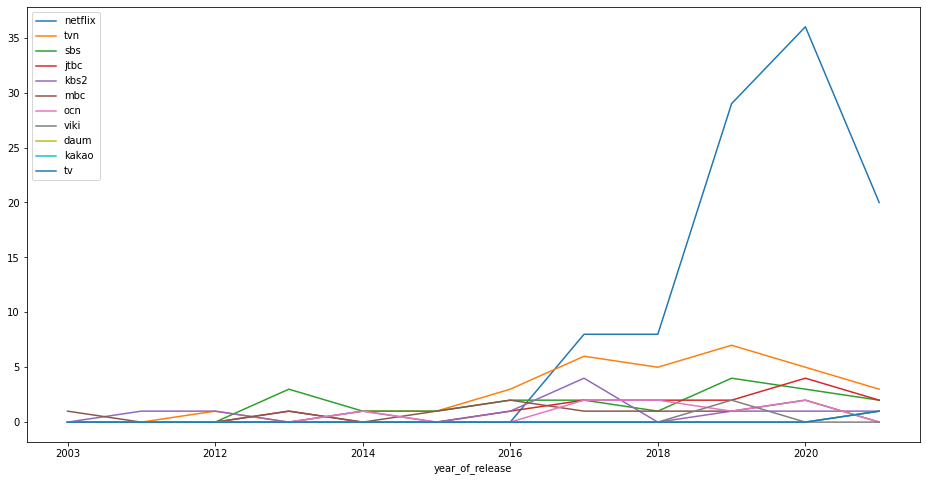

In [ ]:
ko =[i for i in f.index]
f1 = count_keywords_by(data, by='year_of_release', keywords=ko, column='network_tok')
f1.plot(kind='line', figsize=(16,8))

In [ ]:
compar1 = data[data.Name == 'Vincenzo']
print('Name : ',compar1['Name'].loc[11])
print('Synopsis : ',compar1['Synopsis'].loc[11])
print('Genre : ',compar1['Genre'].loc[11])
print('Tags : ',compar1['Tags'].loc[11])

Name :  Vincenzo
Synopsis :  At the age of eight, Park Joo Hyeong went to Italy after being adopted. Now an adult, he is known as Vincenzo Cassano to the Mafia, who employ him as a consigliere. Because mafia factions are at war with each other, he flees to South Korea, where he gets involved with Lawyer Hong Cha Young. She is the type of attorney who will do anything to win a case. Now back at his motherland, he gives an unrivaled conglomerate a taste of its own medicine with a side of justice.
Genre :  Comedy,  Law,  Crime,  Drama 
Tags :  Lawyer, Revenge, Mafia, Smart Male Lead, Eccentric Female Lead, Injustice, Competent Protagonist, Charming Male Lead, Father-Daughter Relationship, Funny Female Lead


In [ ]:
compar2 = data[data.Name == 'My Father is Strange']
compar2

,Name,year_of_release,aired_date,aired_on,number_of_epidsode,Network,Duration,content_rating,Synopsis,Cast,Genre,Tags,Rank,Rating,network_tok
57,My Father is Strange,2017,"Mar 4, 2017 - Aug 27, 2017","Saturday, Sunday",52,KBS2,1 hr. 6 min.,15+ - Teens 15 or older,This drama is about a family that lives on the...,"Kim Yeong Cheol, Kim Hae Sook, Ryu Soo Young, ...","Comedy, Romance, Drama, Family","Huge Family, Family Secret, Sisterhood, Eccent...",#58,8.6,[kbs2]


In [ ]:
compar2 = data[data.Name == 'My Father is Strange']
print('Name : ',compar2['Name'].loc[57])
print('Synopsis : ',compar2['Synopsis'].loc[57])
print('Genre : ',compar2['Genre'].loc[57])
print('Tags : ',compar2['Tags'].loc[57])

Name :  My Father is Strange
Synopsis :  This drama is about a family that lives on the outskirts of Seoul. Byun Han Soo is the father and His wife, Na Yeong Shil is a dedicated, responsible mother to his three daughters and one son including Hye Yeong, Mi Yeong, Ra Yeong, and Joon Young. Suddenly one day, Ahn Joong Hee shows up at the household and declares that he is the son of the family. Joong Hee is an actor who used to be a member of an idol group. He begins to live with them.
Genre :  Comedy,  Romance,  Drama,  Family 
Tags :  Huge Family, Family Secret, Sisterhood, Eccentric Female Lead, Fake Incest, Multiple Couples, Strong Female Lead, Lawyer, Father-Daughter Relationship, Mother-Daughter Relationship
